In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2018-1-1')['Adj Close']

In [3]:
pf_data.head()

,PG,^GSPC
Date,,
2018-01-02,84.104446,2695.810059
2018-01-03,84.002396,2713.060059
2018-01-04,84.596191,2723.989990
2018-01-05,84.651855,2743.149902
2018-01-08,85.097176,2747.709961


In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-04-30,117.870003,2912.429932
2020-05-01,116.820000,2830.709961
2020-05-04,115.769997,2842.739990
2020-05-05,116.010002,2868.439941
2020-05-06,113.099998,2848.419922


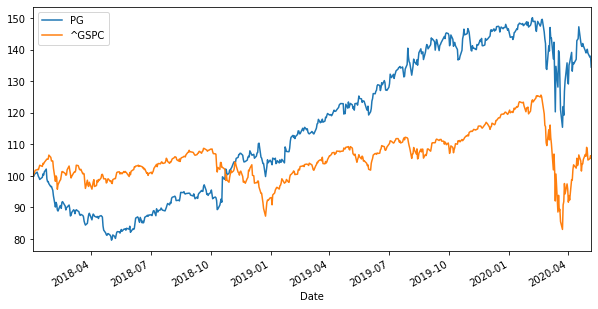

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.125727
^GSPC    0.023373
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.064136,0.039655
^GSPC,0.039655,0.059728


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.640708
^GSPC,0.640708,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([0.7980223 , 0.59214825])

In [13]:
arr[0] + arr[1]

1.3901705572520182

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.53678297, 0.46321703])

In [15]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.07831469625445812

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.05101615012269604

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.22586754995504785

***

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.06952058972961504,
  0.09865316246271373,
  0.0717740164201254,
  0.09303099784984885,
  0.07072840283183292,
  0.07023129731584553,
  0.06861612355960502,
  0.10062711041307096,
  0.12470451239449326,
  0.05542520575883982,
  0.047095760896518846,
  0.09614776864118517,
  0.06274438556585983,
  0.08658196437410882,
  0.06192102676011722,
  0.06448521892574573,
  0.08963584419448478,
  0.08696384481746999,
  0.10750600904442037,
  0.09503667115780327,
  0.11766251086778762,
  0.043347914052221506,
  0.07744671116585039,
  0.03709079989946747,
  0.10041667494180082,
  0.07767058048576332,
  0.09499938789659228,
  0.056465865920147566,
  0.1038920100339746,
  0.07234823791190664,
  0.08771879638329066,
  0.05018777116292752,
  0.07365170221898502,
  0.09108984352442892,
  0.06918743084422552,
  0.1175238163413049,
  0.12179904082482983,
  0.09030843619924843,
  0.049468620033383585,
  0.05763783310477455,
  0.08566095695800889,
  0.06664664840075524,
  0.11492083650031323,
  0.075837

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.11921732, 0.09313808, 0.07769987, 0.07919987, 0.05849281,
        0.07070029, 0.11313312, 0.06745939, 0.08849815, 0.10967293,
        0.02537056, 0.07363544, 0.05655649, 0.04643743, 0.09315666,
        0.0520808 , 0.06444555, 0.08759073, 0.07908669, 0.07301026,
        0.07783397, 0.06675005, 0.07960102, 0.05458007, 0.03822809,
        0.05791686, 0.0657521 , 0.05807302, 0.06943153, 0.06620174,
        0.04535826, 0.10781027, 0.04800496, 0.08730653, 0.09448626,
        0.11766498, 0.05107638, 0.0703065 , 0.09889246, 0.07753156,
        0.08389823, 0.0860637 , 0.05998867, 0.03912918, 0.11337131,
        0.08287023, 0.07874941, 0.11397332, 0.04650878, 0.06074904,
        0.08216509, 0.0537592 , 0.04722591, 0.06011366, 0.07668397,
        0.0695317 , 0.071084  , 0.06146263, 0.06530447, 0.05371842,
        0.07561883, 0.06354439, 0.09013941, 0.07011419, 0.10347049,
        0.09827287, 0.05344775, 0.09456705, 0.04090567, 0.0693863 ,
        0.10386914, 0.07685042, 0.06149464, 0.08

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.119217,0.247392
1,0.093138,0.230356
2,0.077700,0.225769
3,0.079200,0.226022
4,0.058493,0.226271


In [23]:
portfolios.tail()

,Return,Volatility
995,0.083777,0.227053
996,0.059058,0.226157
997,0.086095,0.227723
998,0.092489,0.230076
999,0.063488,0.225472


Text(0, 0.5, 'Expected Return')

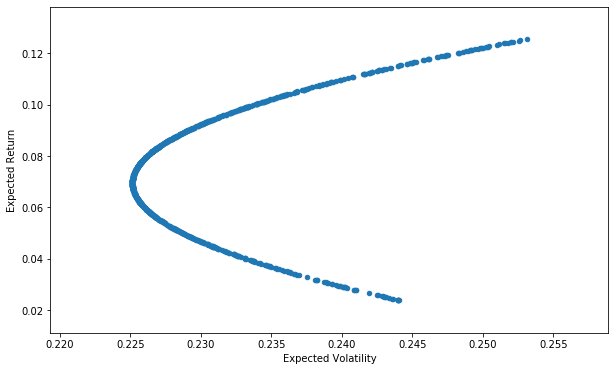

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')